Generate dummy sequences with obvious elements for easy position tracing

Cases:
* fwd sequence, fwd element
* fwd sequence, rev element
* rev sequence, fwd element
* rev sequence, rev element

In [1]:
import json
import sys
sys.path.insert(0, 'modules/')

import SequenceRepresentation as sr

In [2]:
groundtruth = {
    'S+E+': {'seqstrand': '+', 'elemstrand': '+', 'len': 3000, 'elemstart': 1000, 'elemlen': 62},
    'S+E-': {'seqstrand': '+', 'elemstrand': '-', 'len': 4000, 'elemstart': 500, 'elemlen': 62},
    'S-E+': {'seqstrand': '-', 'elemstrand': '+', 'len': 3500, 'elemstart': 3000, 'elemlen': 62},
    'S-E-': {'seqstrand': '-', 'elemstrand': '-', 'len': 2000, 'elemstart': 500, 'elemlen': 62}
}

In [3]:
genomes = []
for seqname in groundtruth:
    param = groundtruth[seqname]
    seq = 'A'*param['len']
    elem = 'G'*param['elemlen']
    seq = seq[:param['elemstart']] + elem + seq[(param['elemstart']+param['elemlen']):]
    assert len(seq) == param['len']
    assert set(seq[:param['elemstart']]) == set('A')
    assert set(seq[(param['elemstart']+param['elemlen']):]) == set('A')
    assert set(seq[param['elemstart']:(param['elemstart']+param['elemlen'])]) == set('G')
    #print(seqname, seq)
    
    sequence = sr.Sequence(species=seqname, chromosome="chr1", strand=param['seqstrand'], 
                           genome_start=0, sequence=seq)
    #element = sr.Sequence(species=seqname, chromosome="chr1", strand=param['elemstrand'], 
    #                      genome_start=param['elemstart'], length=param['elemlen'], seqtype='element',
    #                      no_elements=True, no_homology=True)
    sequence.addSubsequenceAsElement(start=param['elemstart'], end=param['elemstart']+param['elemlen'],
                                     seqtype='element', strand=param['elemstrand'], genomic_positions=True)
    #sequence.addElement(element)
    genome = sr.Genome([sequence])
    genomes.append(genome)
    #print(repr(sequence))

In [4]:
for i, seqname in enumerate(groundtruth):
    sequence = genomes[i][0]
    assert sequence.species == seqname
    element = sequence.genomic_elements[0]
    assert element.strand == groundtruth[seqname]['elemstrand']
    start, end = element.getRelativePositions(sequence)
    assert start == groundtruth[seqname]['elemstart']
    assert end == groundtruth[seqname]['elemstart']+groundtruth[seqname]['elemlen']

In [11]:
import tensorflow as tf
import numpy as np

import sequtils as su
import dataset as dsg
import model
import plotting
import ProfileFindingSetup
import Links

In [6]:
#genomes = SequenceRepresentation.loadJSONGenomeList("checkPositionsGenomes.json")

data = ProfileFindingSetup.ProfileFindingDataSetup('real')
data.addGenomes(genomes, verbose=True)
data.Q = np.ones(21, dtype=np.float32)/21

trainsetup = ProfileFindingSetup.ProfileFindingTrainingSetup(data)
trainsetup.print()

trainsetup.initializeProfiles(enforceU=False, plot=False)
# build and randomly initialize profile model
#tf.keras.backend.clear_session() # avoid memory cluttering by remains of old models
specProModel = None
specProModel = model.SpecificProfile(setup = trainsetup,
                                     alphabet_size = su.aa_alphabet_size)

#if trainsetup.initProfiles is None:
#P_logit_init = specProModel.seed_P_genome()
#specProModel.setP_logit(P_logit_init)

background freqs:  24984.0 *
C 0.0000
K 0.4899
E 0.0002
W 0.0000
T 0.0000
G 0.0098
Y 0.0000
A 0.0000
I 0.0000
N 0.0000
V 0.0000
H 0.0000
S 0.0002
D 0.0000
F 0.4899
M 0.0000
R 0.0002
L 0.0002
P 0.0098
Q 0.0000
* 0.0000
data.mode = real
data.N = 4
data.Q = [0.04761905 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905
 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905
 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905
 0.04761905 0.04761905 0.04761905]
data.toy_genomeSizes = None
data.toy_insertPatterns = None
data.toy_repeatPatterns = None
data.toy_repeatsPerGenome = None
data.toy_multiplyRepeats = None
data.toy_mutationProb = None
data.sim_seqlen = None
data.sim_genelen = None
data.sim_cdist = None
data.sim_ncdist = None
data.sim_tree = None
data.sim_omega = None
tile_size = 334
batch_size = 1
tiles_per_X = 13
prefetch = 3
U = 200
k = 20
midK = 12
s = 0
epochs = 350
alpha = 1e-06
gamma = 1
l2 = 0.01
match_score_factor = 0.7
learning_rate = 2
lr_patie

[DEBUG] >>> sites: [[   1    0  501    0    0]
 [   1    0  502    0    1]
 [   1    0  500    0    2]
 [   1    0  503    0    2]
 [   3    0  501    0    0]
 [   3    0  502    0    1]
 [   3    0  500    0    2]
 [   3    0  503    0    2]
 [   0    0 1002    0    0]
 [   0    0 1003    0    1]
 [   2    0 3002    1    3]
 [   2    0 2999    1    3]
 [   2    0 3001    1    4]
 [   2    0 3000    1    5]
 [   0    0 1002    1    3]
 [   0    0  999    1    3]
 [   0    0 1001    1    4]
 [   0    0 1000    1    5]
 [   3    0  500    1    3]
 [   3    0  502    1    4]]
[DEBUG] >>> siteScores: [[60.89044]
 [60.89044]
 [60.89044]
 [60.89044]
 [60.89044]
 [60.89044]
 [60.89044]
 [60.89044]
 [60.89044]
 [60.89044]
 [60.89044]
 [60.89044]
 [60.89044]
 [60.89044]
 [60.89044]
 [60.89044]
 [60.89044]
 [60.89044]
 [60.89044]
 [60.89044]]


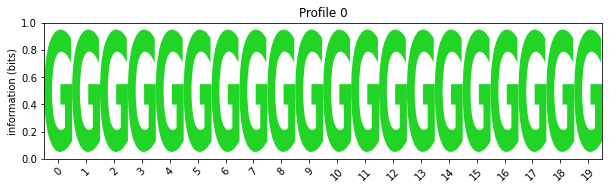

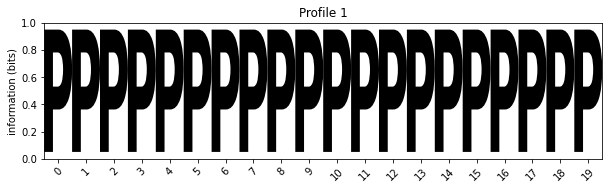

In [7]:
# get match sites of profiles
fwdAA = su.sequence_translation('G'*60)
revAA = su.sequence_translation('C'*60)
artProfiles = np.concatenate([np.expand_dims(dsg.oneHot(fwdAA), -1), np.expand_dims(dsg.oneHot(revAA), -1)], axis=-1)

plotting.plotLogo(artProfiles)

thresh = specProModel.max_profile_scores(specProModel.setup.getDataset(withPosTracking = True, original_data=True), 
                                         artProfiles)

sites, siteScores, _ = specProModel.get_profile_match_sites(specProModel.setup.getDataset(withPosTracking = True, original_data=True), 
                                                            thresh, otherP = artProfiles)

sites = sites.numpy()
siteScores = siteScores.numpy()
    
print("[DEBUG] >>> sites:", sites[:20,]) # (sites, (genomeID, contigID, pos, u, f))
print("[DEBUG] >>> siteScores:", siteScores[:20,])

In [9]:
def investigateSite(site, aa_flank=2):
    """ given a site, extract the DNA and translated AA position it points to +- neighbouring nt/aa """
    dna_flank = 3*aa_flank
    
    genomeID, contigID, pos, u, f = site
    
    # get sequence and translate aa (use the appropriate frame of the site)
    sequence = genomes[genomeID][contigID]
    sft = su.six_frame_translation(genomes[genomeID][contigID].sequence)[f]
    aapos = su.convert_six_frame_position(pos, f, len(sequence))
    
    print(f"Genome {sequence.id}, profile {u}, match at DNA pos {pos} / AA pos {aapos}, frame {f}")
    subseq = sequence.sequence[pos-dna_flank:(pos+dna_flank+3)]
    if (f >= 3):
        subseq = sr.Sequence("", "", "-", 0, sequence=subseq).getSequence(rc = True)
        
    print(subseq)
    print('  '.join(sft[aapos-aa_flank:aapos+aa_flank+1]))
    print('  '.join(su.sequence_translation(subseq)), "-- re-translated subsequence")
    print()
    print(su.to_aa_seq(artProfiles[:,:,u]), "-- profile seq")
    print()
    print()
    print()
          
        
for site in sites:
    investigateSite(site)

Genome S+E-:chr1:0-4,000, profile 0, match at DNA pos 501 / AA pos 167, frame 0
AAAAAGGGGGGGGGG
K  K  G  G  G
K  K  G  G  G -- re-translated subsequence

GGGGGGGGGGGGGGGGGGGG -- profile seq



Genome S+E-:chr1:0-4,000, profile 0, match at DNA pos 502 / AA pos 167, frame 1
AAAAGGGGGGGGGGG
K  R  G  G  G
K  R  G  G  G -- re-translated subsequence

GGGGGGGGGGGGGGGGGGGG -- profile seq



Genome S+E-:chr1:0-4,000, profile 0, match at DNA pos 500 / AA pos 166, frame 2
AAAAAAGGGGGGGGG
K  K  G  G  G
K  K  G  G  G -- re-translated subsequence

GGGGGGGGGGGGGGGGGGGG -- profile seq



Genome S+E-:chr1:0-4,000, profile 0, match at DNA pos 503 / AA pos 167, frame 2
AAAGGGGGGGGGGGG
K  G  G  G  G
K  G  G  G  G -- re-translated subsequence

GGGGGGGGGGGGGGGGGGGG -- profile seq



Genome S-E-:chr1:0-2,000, profile 0, match at DNA pos 501 / AA pos 167, frame 0
AAAAAGGGGGGGGGG
K  K  G  G  G
K  K  G  G  G -- re-translated subsequence

GGGGGGGGGGGGGGGGGGGG -- profile seq



Genome S-E-:chr1:0-2,000, profile 0

In [12]:
links, linkProfiles, skipped = Links.linksFromSites(sites, specProModel.setup.k*3, specProModel.setup.data.genomes, 10000)
print("[DEBUG] >>> links[:5]", links[:5])
print("[DEBUG] >>> len(links)", len(links))
print("[DEBUG] >>> len(skipped)", len(skipped))
#links = [sorted(l) for l in links]

[DEBUG] >>> links[:5] [Link(occs=[[0, 0, 1002], [1, 0, 501], [3, 0, 501]], span=60, genomes=[Genome from S+E+ with 1 chromosomes: chr1, Genome from S+E- with 1 chromosomes: chr1, Genome from S-E+ with 1 chromosomes: chr1, Genome from S-E- with 1 chromosomes: chr1], expandMatchParameter=5, expandMismatchParameter=-4, expandScoreThreshold=20, expandX=100), Link(occs=[[0, 0, 1003], [1, 0, 501], [3, 0, 501]], span=60, genomes=[Genome from S+E+ with 1 chromosomes: chr1, Genome from S+E- with 1 chromosomes: chr1, Genome from S-E+ with 1 chromosomes: chr1, Genome from S-E- with 1 chromosomes: chr1], expandMatchParameter=5, expandMismatchParameter=-4, expandScoreThreshold=20, expandX=100), Link(occs=[[0, 0, 1002], [1, 0, 501], [3, 0, 502]], span=60, genomes=[Genome from S+E+ with 1 chromosomes: chr1, Genome from S+E- with 1 chromosomes: chr1, Genome from S-E+ with 1 chromosomes: chr1, Genome from S-E- with 1 chromosomes: chr1], expandMatchParameter=5, expandMismatchParameter=-4, expandScoreThr

In [13]:
su.to_aa_seq(artProfiles[:,:,0])

'GGGGGGGGGGGGGGGGGGGG'

In [14]:
# remove non-element kmers
kmers0 = trainsetup.initKmerPositions['GGGGGGGGGGGG']
kmers1 = trainsetup.initKmerPositions['PPPPPPPPPPPP']
trainsetup.initKmerPositions = {'GGGGGGGGGGGG': kmers0, 'PPPPPPPPPPPP': kmers1}

In [15]:
groundtruth

{'S+E+': {'seqstrand': '+',
  'elemstrand': '+',
  'len': 3000,
  'elemstart': 1000,
  'elemlen': 62},
 'S+E-': {'seqstrand': '+',
  'elemstrand': '-',
  'len': 4000,
  'elemstart': 500,
  'elemlen': 62},
 'S-E+': {'seqstrand': '-',
  'elemstrand': '+',
  'len': 3500,
  'elemstart': 3000,
  'elemlen': 62},
 'S-E-': {'seqstrand': '-',
  'elemstrand': '-',
  'len': 2000,
  'elemstart': 500,
  'elemlen': 62}}

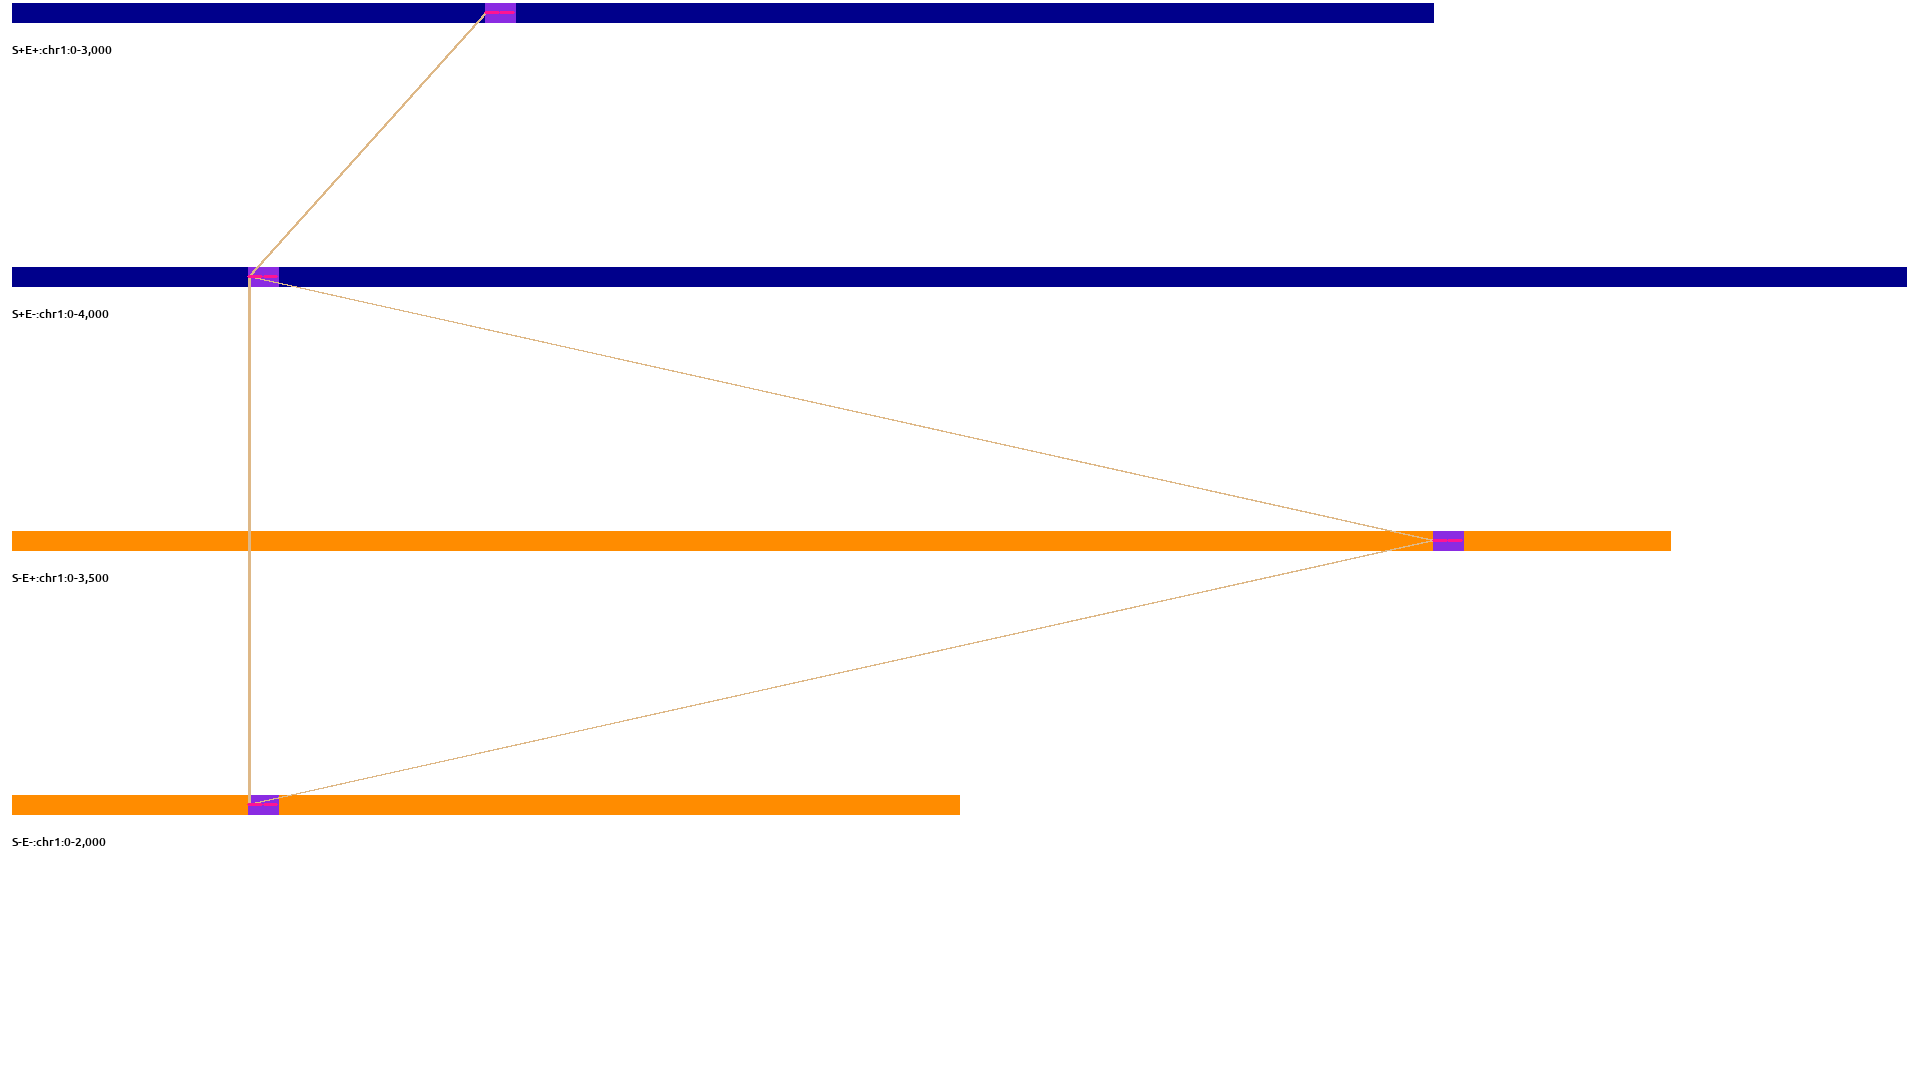

In [16]:
kmerSites = []
for kmer in trainsetup.initKmerPositions:
    kmerSites.extend(trainsetup.initKmerPositions[kmer])

masksides = specProModel.getMaskedSites(0)

plotting.drawGeneLinks_SequenceRepresentationData(data.genomes, links, 
                                                  imname=None, kmerSites=kmerSites, kmerCol='deeppink',
                                                  maskingSites=masksides, maskingCol='chocolate')

---

## Conclusion

Position tracing and conversion (still) works. Need to be careful when/if to fetch a RC-sequence instead of the fwd-sequence, 
and also when/if to use relative positions from a Sequence element based on the RC parent.

In general, positions returned from model.get_profile_match_sites() refer correctly to the top strand, thus drawing also needs
to use top strand coordinates.